In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# All columns related to moral questions
moral = pd.read_spss('./GSS/GSS7218_R3.sav', usecols=["YEAR", 'GUNLAW', "GRASS","HOMOSEX","INCOME"], 
                     convert_categoricals=True)

In [ ]:
moral["YEAR"] = np.array(moral["YEAR"]).astype(int)

In [ ]:
moral = moral[moral['YEAR'] >=2000]
moral

,YEAR,INCOME,GUNLAW,GRASS,HOMOSEX
38116,2000,NaN,OPPOSE,NaN,NOT WRONG AT ALL
38117,2000,$8000 TO 9999,FAVOR,NOT LEGAL,NaN
38118,2000,$15000 - 19999,NaN,NOT LEGAL,NaN
38119,2000,$25000 OR MORE,NaN,LEGAL,NaN
38120,2000,$25000 OR MORE,NaN,NOT LEGAL,NaN
...,...,...,...,...,...
64809,2018,NaN,OPPOSE,NaN,NOT WRONG AT ALL
64810,2018,$25000 OR MORE,OPPOSE,NaN,NaN
64811,2018,$25000 OR MORE,FAVOR,LEGAL,NOT WRONG AT ALL
64812,2018,$25000 OR MORE,NaN,NOT LEGAL,NaN


In [ ]:
moral["HOMOSEX"].unique()

['NOT WRONG AT ALL', NaN, 'ALWAYS WRONG', 'ALMST ALWAYS WRG', 'SOMETIMES WRONG']
Categories (4, object): ['NOT WRONG AT ALL', 'ALWAYS WRONG', 'ALMST ALWAYS WRG', 'SOMETIMES WRONG']

In [ ]:
moral_gun_grass = moral[["GUNLAW", "GRASS"]]
moral_gun_grass = pd.get_dummies(moral_gun_grass)[["GUNLAW_FAVOR", "GRASS_LEGAL"]]
moral_gun_grass

,GUNLAW_FAVOR,GRASS_LEGAL
38116,0,0
38117,1,0
38118,0,0
38119,0,1
38120,0,0
...,...,...
64809,0,0
64810,0,0
64811,1,1
64812,0,0


In [ ]:
arr = np.vstack((moral_gun_grass["GUNLAW_FAVOR"], moral_gun_grass["GRASS_LEGAL"]))
arr = moral_gun_grass.value_counts().to_numpy().reshape(2,2)
arr

array([[11608,  8604],
       [ 4000,  2486]])

Text(0.5, 15.0, 'GUNLAW_FAVOR')

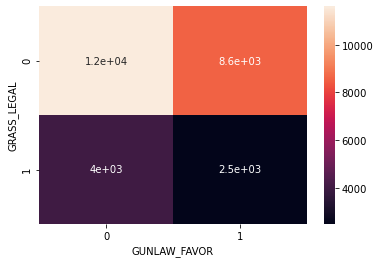

In [ ]:
sns.heatmap(data=arr, annot = True)
plt.ylabel("GRASS_LEGAL")
plt.xlabel("GUNLAW_FAVOR")

Text(0.5, 15.0, 'GRASS_LEGAL')

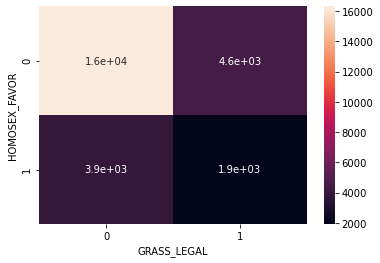

In [ ]:
homosex_cat  = pd.get_dummies(moral["HOMOSEX"])
homosex_cat = homosex_cat[["NOT WRONG AT ALL"]]
homosex_cat = homosex_cat.rename(columns = {"NOT WRONG AT ALL": "HOMOSEX_FAVOR"})
moral_gun_grass["HOMOSEX_FAVOR"] = homosex_cat["HOMOSEX_FAVOR"]
moral_transformed = moral_gun_grass
arr = moral_transformed[["GRASS_LEGAL", "HOMOSEX_FAVOR"]].value_counts().to_numpy().reshape(2,2)
sns.heatmap(data=arr, annot = True)
plt.ylabel("HOMOSEX_FAVOR")
plt.xlabel("GRASS_LEGAL")

Text(0.5, 15.0, 'GRASS_LEGAL')

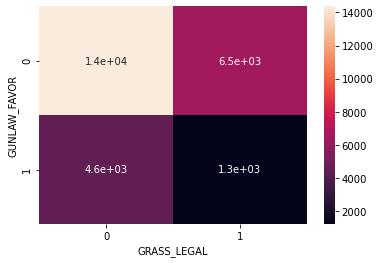

In [ ]:
arr = moral_transformed[["GUNLAW_FAVOR", "HOMOSEX_FAVOR"]].value_counts().to_numpy().reshape(2,2)
sns.heatmap(data=arr, annot = True)
plt.ylabel("GUNLAW_FAVOR")
plt.xlabel("GRASS_LEGAL")

<AxesSubplot:>

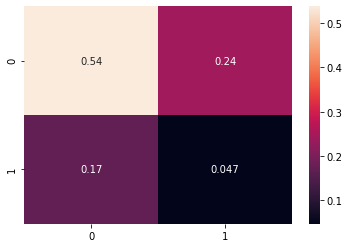

In [ ]:
sns.heatmap(arr / np.sum(arr), annot=True)

<AxesSubplot:>

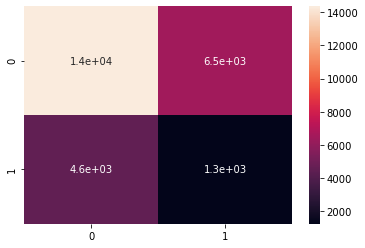

In [ ]:
test_df = moral_transformed[["GUNLAW_FAVOR", "HOMOSEX_FAVOR"]]
normed = ()/np.sum(test_df)
sns.heatmap(data=normed.value_counts().to_numpy().reshape(2,2), annot = True)

In [ ]:
income = moral[["INCOME"]]
income_dummies = pd.get_dummies(income["INCOME"])
income_dummies = income_dummies[["LT $1000", "$1000 TO 2999", "$3000 TO 3999", "$4000 TO 4999", "$5000 TO 5999",
                               "$6000 TO 6999",  "$7000 TO 7999", "$8000 TO 9999", "$10000 - 14999", "$15000 - 19999",
                                "$20000 - 24999", "$25000 OR MORE"]]
income_dummies

,LT $1000,$1000 TO 2999,$3000 TO 3999,$4000 TO 4999,$5000 TO 5999,$6000 TO 6999,$7000 TO 7999,$8000 TO 9999,$10000 - 14999,$15000 - 19999,$20000 - 24999,$25000 OR MORE
38116,0,0,0,0,0,0,0,0,0,0,0,0
38117,0,0,0,0,0,0,0,1,0,0,0,0
38118,0,0,0,0,0,0,0,0,0,1,0,0
38119,0,0,0,0,0,0,0,0,0,0,0,1
38120,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64809,0,0,0,0,0,0,0,0,0,0,0,0
64810,0,0,0,0,0,0,0,0,0,0,0,1
64811,0,0,0,0,0,0,0,0,0,0,0,1
64812,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
income_bins = pd.DataFrame(income_dummies.sum())
income_bins = income_bins.reset_index()
income_bins = income_bins.rename(columns = {"index": "category", 0: "count"})
income_bins

,category,count
0,LT $1000,366
1,$1000 TO 2999,306
2,$3000 TO 3999,221
3,$4000 TO 4999,155
4,$5000 TO 5999,218
5,$6000 TO 6999,253
6,$7000 TO 7999,269
7,$8000 TO 9999,515
8,$10000 - 14999,1681
9,$15000 - 19999,1379


<BarContainer object of 12 artists>

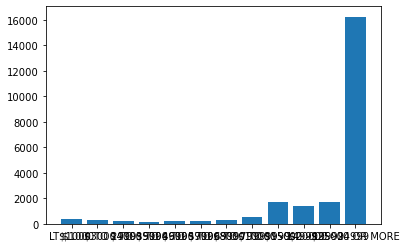

In [ ]:
plt.bar(income_bins['category'], income_bins['count'])
plt.

<AxesSubplot:ylabel='Count'>

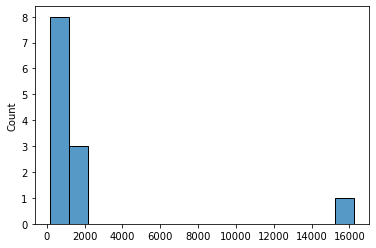

In [ ]:
sns.histplot(np.array(income_bins))